# Plot PERSIANN Yearly Total Precipitation

In [38]:
import time
import gzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def read_gz(fn):   
    # fn = '/storage/coda1/p-rbras6/0/njadidoleslam3/persiann/persiann.eng.uci.edu/CHRSdata/PERSIANN/hrly/2006/m6s4rr0606100.bin.gz'
    try:
        f=gzip.GzipFile(fn)
        file_content = f.read()
        array = np.frombuffer(file_content, dtype='>f4')
        return array.reshape(480,1440, 1)
    except:
        return np.ones((480, 1440, 1))* -9999.0
def read_gz(fn):   
    # fn = '/storage/coda1/p-rbras6/0/njadidoleslam3/persiann/persiann.eng.uci.edu/CHRSdata/PERSIANN/hrly/2006/m6s4rr0606100.bin.gz'
    # try:
    f=gzip.GzipFile(fn)
    file_content = f.read()
    array = np.frombuffer(file_content, dtype='>f4')
    return array.reshape(480,1440, 1)
    # except:
    #     return np.ones((480, 1440, 1))* -9999.0
def create_dt_vec(year):
    # returns date vector as 
    # 1- date string with %yy%DOY%H 2- a vector of the months
    year = 2020
    start_dt = '{year}-1-1'.format(year = year)
    end_dt = '{year}-1-1'.format(year = year + 1)
    dt_vec = pd.date_range(start=start_dt, end=end_dt, freq='60min',closed='left')
    return dt_vec.strftime('%y%j%H').values, dt_vec.month

data = dict()
for year in range(2001,2020):
    fn1 = '/storage/coda1/p-rbras6/0/njadidoleslam3/projects/stochsm/persiann_analysis/trash/yearly/ms6s4_y{year}.bin.gz'.format(year = str(year)[2:])
    data[str(year)] = read_gz(fn1)




In [39]:
for year in range(2001, 2020):
    a1 = np.concatenate((data[str(year)][:,720:,0],data[str(year)][:,:720,0]), axis=1)
    fig, ax = plt.subplots(figsize=(20,10))
    a = ax.imshow(a1, vmin=0, vmax = 2000, cmap=plt.cm.Blues)
    cax = plt.axes([0.92, 0.25, 0.02, 0.5])
    plt.colorbar(a, cax=cax)
    fig.savefig('/storage/coda1/p-rbras6/0/njadidoleslam3/projects/stochsm/persiann_analysis/trash/yearly_total_maps/{year}'.format(year = year))
    plt.close()

TypeError: 'float' object cannot be interpreted as an integer

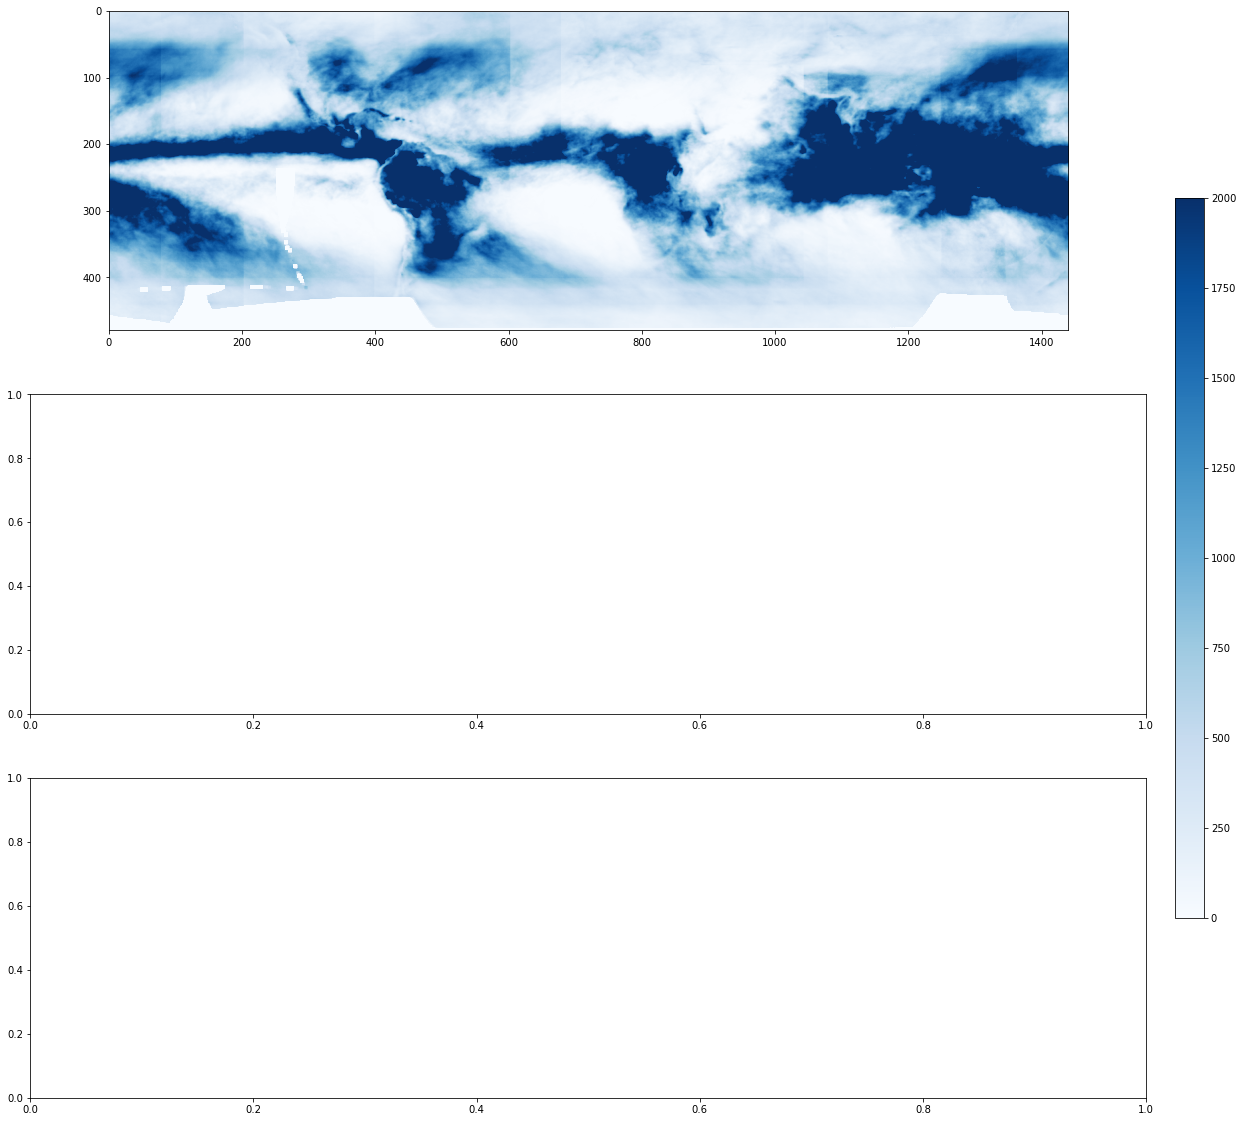

In [58]:
import scipy.ndimage.filters
import numpy as np
a1 = np.concatenate((data[str(2001)][:,720:,0],data[str(2001)][:,:720,0]), axis=1)
fig, ax = plt.subplots(3,1,figsize=(20,20))
a = ax[0].imshow(a1, vmin=0, vmax = 2000, cmap=plt.cm.Blues)
cax = plt.axes([0.92, 0.25, 0.02, 0.5])
plt.colorbar(a, cax=cax)
a2 = gaussian_filter(a1, sigma=1)

def Func(a):
    a = a.reshape((3,3))
    weights = np.array([[0.5,.05,0.5],[0.5,1,0.5],[0.5,0.5,0.5]])
    a = np.multiply(a,weights)
    a = np.sum(a)
    return a

out = scipy.ndimage.filters.generic_filter(a1,Func,footprint=np.ones((3,3)),mode='constant',cval=0.0,origin=0.0)

ax[1].imshow(a2, vmin=0, vmax = 2000, cmap=plt.cm.Blues)
ax[2].imshow(out, vmin=0, vmax = 2000, cmap=plt.cm.Blues)

In [56]:
kernel

array([[3.12055828e-11, 1.18196079e-10, 4.07063015e-10, 1.27470010e-09,
        3.62946155e-09, 9.39645807e-09, 2.21194316e-08, 4.73447194e-08,
        9.21418511e-08, 1.63053498e-07, 2.62356067e-07, 3.83830873e-07,
        5.10594930e-07, 6.17590908e-07, 6.79224108e-07, 6.79224108e-07,
        6.17590908e-07, 5.10594930e-07, 3.83830873e-07, 2.62356067e-07,
        1.63053498e-07, 9.21418511e-08, 4.73447194e-08, 2.21194316e-08,
        9.39645807e-09, 3.62946155e-09, 1.27470010e-09, 4.07063015e-10,
        1.18196079e-10, 3.12055828e-11],
       [1.18196079e-10, 4.47686339e-10, 1.54181554e-09, 4.82812820e-09,
        1.37471595e-08, 3.55905707e-08, 8.37808447e-08, 1.79325611e-07,
        3.49001831e-07, 6.17590908e-07, 9.93715088e-07, 1.45382012e-06,
        1.93395903e-06, 2.33922322e-06, 2.57266871e-06, 2.57266871e-06,
        2.33922322e-06, 1.93395903e-06, 1.45382012e-06, 9.93715088e-07,
        6.17590908e-07, 3.49001831e-07, 1.79325611e-07, 8.37808447e-08,
        3.55905707e-08,

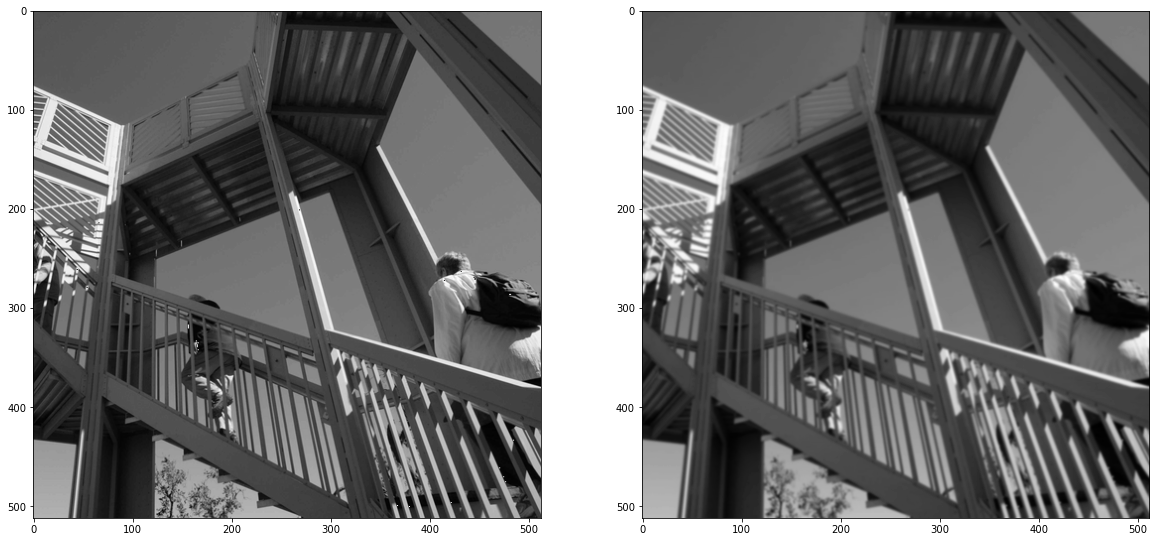

In [46]:
from scipy import misc
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
a = np.arange(50, step=2).reshape((5,5))
fig = plt.figure(figsize=(20,10))
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()
result = gaussian_filter(ascent, sigma=1)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()

In [47]:
ascent

array([[ 83,  83,  83, ..., 117, 117, 117],
       [ 82,  82,  83, ..., 117, 117, 117],
       [ 80,  81,  83, ..., 117, 117, 117],
       ...,
       [178, 178, 178, ...,  57,  59,  57],
       [178, 178, 178, ...,  56,  57,  57],
       [178, 178, 178, ...,  57,  57,  58]])

In [1]:
import time
import gzip
import numpy as np
import pandas as pd
def read_gz(fn):   
    # fn = '/storage/coda1/p-rbras6/0/njadidoleslam3/persiann/persiann.eng.uci.edu/CHRSdata/PERSIANN/hrly/2006/m6s4rr0606100.bin.gz'
    try:
        f=gzip.GzipFile(fn)
        file_content = f.read()
        array = np.frombuffer(file_content, dtype='>f4')
        return array.reshape(480,1440, 1)
    except:
        return np.ones((480, 1440, 1))* -9999.0
def create_dt_vec(year):
    # returns date vector as 
    # 1- date string with %yy%DOY%H 2- a vector of the months
    year = 2020
    start_dt = '{year}-1-1'.format(year = year)
    end_dt = '{year}-1-1'.format(year = year + 1)
    dt_vec = pd.date_range(start=start_dt, end=end_dt, freq='60min',closed='left')
    return dt_vec.strftime('%y%j%H').values, dt_vec.month

# fn = '/storage/coda1/p-rbras6/0/njadidoleslam3/persiann/persiann.eng.uci.edu/CHRSdata/PERSIANN/hrly/2020/m6s4rr2000200.bin.gz'
year = 2020
fn_list, dt_vec = create_dt_vec(year)
fn_list = fn_list[0:100]
data = np.ones((480,1440, len(fn_list)))
data = read_gz(fn_list[0])
start = time.time()
for i, fn in enumerate(fn_list[1:100]):
    data = np.append(data, read_gz(fn), axis=2)

end = time.time()
print ("Using custom iterator : ", round(end-start, 5), end="\n")


Using custom iterator :  10.56733


In [2]:
data.shape

(480, 1440, 100)

In [114]:
import sys
sys.getsizeof(data)/1024**3

0.5149842575192451

In [79]:
import time
import gzip
import numpy as np
import pandas as pd
import pickle

def read_gz(fn):   
    # fn = '/storage/coda1/p-rbras6/0/njadidoleslam3/persiann/persiann.eng.uci.edu/CHRSdata/PERSIANN/hrly/2006/m6s4rr0606100.bin.gz'
    try:
        f=gzip.GzipFile(fn)
        file_content = f.read()
        array = np.frombuffer(file_content, dtype='>f4')
        return array.reshape(480,1440)
    except:
        return np.ones((480, 1440))* -9999.0


def create_dt_vec(year):
    # returns date vector as 
    # 1- date string with %yy%DOY%H 2- a vector of the months
    # year = 2020
    start_dt = '{year}-1-1'.format(year = year)
    end_dt = '{year}-1-1'.format(year = year + 1)
    dt_vec = pd.date_range(start=start_dt, end=end_dt, freq='60min',closed='left')
    return dt_vec.strftime('%y%j%H').values, dt_vec.month


def extract_events1(p_data):
    # %%timeit
    def storm_def():
        def calc_min_mit_new(p_events):
            idx, = np.where((np.diff(np.sign(p_events[:, 1]-1)) != 0)*1 == 1)
            if len(idx) == 0:
                a = np.abs(p_events[:, 1]-1)
                idx, = np.where(a == a.min())
                return p_events[:, 0][idx][0]
            return (p_events[:, 0][idx][0]+p_events[:, 0][idx+1][0])/2.0


        def check_mits_new(mit):
            idx = (bin_events_month <= -mit)*(bin_events_month < 0)
            dry_periods = bin_events_month[idx]*-1
            return np.array([mit, np.std(dry_periods[:]) / np.mean(dry_periods[:]),
                            np.int32(np.mean(dry_periods[:]))])


        # One-time operations for dry-wet periods        
        p_data[-1] = 1
        v = (p_data == 0)*1
        n = v == 0
        a = ~n
        c = np.cumsum(a)
        d = np.diff(np.append([0.], c[n]))
        v[n] = -d
        dry_vec = np.cumsum(v)
        bin_events = np.append([1], np.diff(dry_vec))

        event_idx = bin_events < 0

        # Initialize the result array
        result = []

        # Loop over each month
        for m in range(1,13):
            mnth_idx = dt_vec == m
            bin_events_month = bin_events[event_idx & mnth_idx]
            # CONDITION 1: If no events, skip the month
            if (len(bin_events_month) == 0):
                # DO NOTHING
                continue

            # CONDITION 2: For Jan - November
            if m < 12:
                idx_next_events = np.where((dt_vec > m) & (event_idx))

                bin_events_next_events = bin_events[idx_next_events]
                bin_events_month = np.append(
                    bin_events_month, bin_events[idx_next_events[0][0]])

                mit_dry = []
                for mit in mit_list:
                    _mit = check_mits_new(mit)
                    mit_dry.append(_mit)
                    if ((_mit[1] < 1.0) & (len(mit_dry) > 1)):
                        break    # condition satisfied

                mit_dry = np.array(mit_dry)
                min_mit = calc_min_mit_new(mit_dry)

                idx = (bin_events <= -min_mit) * (bin_events < 0) * (dt_vec == m)
                date_idx = np.where(idx)[0]

                date_idx_month = np.append(date_idx, idx_next_events[0][0])
                dry_periods = bin_events[date_idx_month]*-1

                event_durations = date_idx_month[1:] - \
                    dry_periods[1:] - date_idx_month[0:-1]
                event_indices = date_idx_month[0:-1] + event_durations
                n_events = len(event_durations)

                p_totals = [0]*n_events
                for i in range(n_events):
                    p_totals[i] = np.sum(p_data[date_idx[i]:event_indices[i]+1])
                result.append([[m]*n_events, event_durations,
                            dry_periods[0:-1], p_totals/event_durations])
            
            # CONDITION 3: For December
            if m == 12:
                if (len(bin_events_month) == 1):
                    continue
                mit_dry = []
                for mit in mit_list:
                    _mit = check_mits_new(mit)
                    mit_dry.append(_mit)
                    if ((_mit[1] < 1.0) & (len(mit_dry) > 1)):
                        break    # condition satisfied
                mit_dry = np.array(mit_dry)
                min_mit = calc_min_mit_new(mit_dry)

                idx = (bin_events <= -min_mit) * (bin_events < 0) * (dt_vec == m)
                date_idx_month = np.where(idx)[0]
                dry_periods = bin_events[date_idx_month]*-1

                date_idx = np.where(idx)[0]
                event_durations = date_idx[1:] - dry_periods[1:] - date_idx[0:-1]
                event_indices = date_idx[0:-1] + event_durations
                n_events = len(event_durations)


                p_totals = [0]*n_events
                for i in range(n_events):
                    p_totals[i] = np.sum(p_data[date_idx[i]:event_indices[i]+1])

                result.append([[m]*n_events, event_durations,
                            dry_periods[0:-1], p_totals/event_durations])

        return result
    #######################

    n_data = len(p_data)
    # pos_idx = np.sum((p_data>=0) & (p_data<65535))
        
    # if (float(np.sum(pos_idx)/n_data)==0):
    #     events = [np.nan,np.nan,np.nan]
    #     return events
    #     # print('No data 2')
    # else:
    #     try:  
    p_data[p_data<0] = 0.0
    events = storm_def()
    return events
        # except:
        #     return [np.nan,np.nan,np.nan]
    

######### INPUTS ##########
# year = int(sys.argv[1])
year = 2006
######### INPUTS ##########

######### Global Variables #########
## Formatting variables

out_pickle_fmt = '/storage/coda1/p-rbras6/0/njadidoleslam3/projects/stochsm/persiann_analysis/events_mbased/{year}.pickle'
fn_out_pickle = out_pickle_fmt.format(year=year)

#### variables for defining the events
set_min_mit = 3
mit_list = [x for x in range(set_min_mit,12*24, 6)]
####

### Date vector converted to month index array
fn_list, dt_vec = create_dt_vec(year)
dt_vec = dt_vec[0:1000]
data = np.ones((480,1440, 1000))

for i, fn in enumerate(fn_list[0:1000]):
    fn1 = '/storage/coda1/p-rbras6/0/njadidoleslam3/persiann/persiann.eng.uci.edu/CHRSdata/PERSIANN/hrly/{year}/m6s4rr{fn}.bin.gz'.format(fn=fn, year = year)
    data[:,:,i] = read_gz(fn1)
# 5 minutes up to here

# npy_out = '/storage/coda1/p-rbras6/0/njadidoleslam3/persiann/yearly/{year}.npy'.format(year = year)
# with open(npy_out, 'wb') as f:
#     np.save(f,data, allow_pickle=True)

grid_y_list = list(range(480))
grid_x_list = list(range(1440))
######### Global Variables #########

# with open(fn_out_pickle, 'wb') as handle:
    
for grid_y in grid_y_list[2:3]:
    # data = np.array(f.variables['p01m'][:, grid_y , :].data)
    lol = []
    for grid_x in grid_x_list:
        gid = int('1{gid_x}{gid_y}'.format(gid_x = str(grid_x).zfill(4), gid_y = str(grid_y).zfill(4)))
        events = extract_events1(data[grid_y, grid_x, :])
        lol.append([gid,year,] + events)
        # pickle.dump(lol, handle, protocol= pickle.HIGHEST_PROTOCOL)




IndexError: index 0 is out of bounds for axis 0 with size 0

In [78]:
1000/24

41.666666666666664

In [10]:
a = ['111', 2002,]
b = (2,3,4)
lol = []
lol.append(a + b)

TypeError: can only concatenate list (not "tuple") to list

In [67]:
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
# points = gpd.read_file('points.shp')

xmin, ymin, xmax, ymax = [0, -60, 360, 60]

length = 0.25
wide = 0.25

cols = list(np.arange(xmin, xmax, 0.25))
rows = list(np.arange(ymin, ymax, 0.25))

polygons = []
for y in rows:
    for x in cols:
        if x > 180:
            x = x-360
            polygons.append(Polygon([(x,y), (x+wide, y), (x+wide, y+length), (x, y+length)]))
        else:
            polygons.append(Polygon([(x,y), (x+wide, y), (x+wide, y+length), (x, y+length)]))

# grid_y_list = list(range(480))
# grid_x_list = list(range(1440))
# ######### Global Variables #########

# grid_x, grid_y = np.meshgrid(np.arange(1440),np.arange(480))
# grid_xy = grid_x*10**4 + (grid_y) + 10**8

grid_x, grid_y = np.meshgrid(np.arange(1440),np.arange(480))
grid_xy = grid_x*10**4 + (479-grid_y) + 10**8
grid_xy = grid_xy.ravel()

grid = gpd.GeoDataFrame({'geometry':polygons, 'grid_xy':grid_xy})
grid.to_file("/storage/coda1/p-rbras6/0/njadidoleslam3/projects/stochsm/data/gis_files/persiann/grid.shp")

In [68]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import ticker
from datetime import datetime
import geopandas as gpd


def read_pickle(fn):
    data_test = []
    with open(fn, 'rb') as handle:
        try:
            while True:
                data_test.append(pickle.load(handle))
        except EOFError:
            pass
    return data_test



month = 5

pickle_fmt = '/storage/coda1/p-rbras6/0/njadidoleslam3/projects/stochsm/persiann_analysis/events_mbased/summary/{month}.pickle'
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


fn_st_grid_masked = '/storage/coda1/p-rbras6/0/njadidoleslam3/projects/stochsm/data/gis_files/persiann/grid.shp'
# fn_us_states = '/storage/coda1/p-rbras6/0/njadidoleslam3/projects/stochsm/data/gis_files/conus/conus_states.geojson'

var_list = {
    'tr':       {'max':48, 'min':0, 'label': 'Mean Event Duration [$hr$]', 'bw':6,'nbins':8, 'cmap':'Blues' },
    'i':        {'max':5, 'min':0, 'label': 'Mean Intensity [$mm/hr$]', 'bw':1,'nbins':10,'cmap':'Blues'},
    'tb':       {'max':360, 'min':0, 'label': 'Mean Interarrival Time [$hr$]', 'bw':12, 'nbins':15, 'cmap':'Reds'},
    'h':        {'max':23, 'min':3, 'label': 'Mean Storm Depth [$mm$]', 'bw':3,'nbins':20, 'cmap':'Blues'},
    'count':    {'max':15, 'min':0, 'label': 'Mean Number of Events', 'bw':1,'nbins':15, 'cmap':'Blues'},
    'CV':       {'max':1.2, 'min':0.80, 'label': 'Coef. Var.', 'bw':0.05,'nbins':8, 'cmap':'RdBu'}
    }
# '''
# 'lambda':   {'max':0.26, 'min':0, 'label': 'RMSE [$cm^3/cm^3$]',     'bw':0.01, 'nbins':13, 'cmap':'YlOrRd' },
# 'kappa':    {'max':0.25, 'min':0,  'label': 'MAE [$cm^3/cm^3$]',     'bw':0.01,'nbins':13,'cmap':'Greens'},
# 'cv_tb':    {'max':1.2, 'min':0.8, 'label': '$CV_{tb}$', 'bw':.04,'nbins':10, 'cmap':'RdBu' }}'''




grid_masked = gpd.read_file(fn_st_grid_masked)


# us_states = gpd.read_file(fn_us_states)
# us_states = us_states.to_crs(4326)

# xlim = ([us_states.total_bounds[0],  us_states.total_bounds[2]])
# ylim = ([us_states.total_bounds[1],  us_states.total_bounds[3]])




in_pickle = pickle_fmt.format(month = month)
summary = read_pickle(in_pickle)
summary = summary[0]
summary['grid_xy'] = summary['grid_xy'].astype(np.int64)
data = grid_masked.merge(summary)

for variable in list(var_list.keys())[0:1]:
        


    out_pth = '/storage/coda1/p-rbras6/0/njadidoleslam3/projects/stochsm/figures/persiann/summary/{variable}/'.format(variable = variable)
    out_fn = '{variable}_{month}.jpg'.format(variable = variable, month=month)

    if not os.path.exists(out_pth):
        os.makedirs(out_pth)

    fn_temp = '{variable}.png'
    cm1 = plt.cm.get_cmap(var_list[variable]['cmap'],var_list[variable]['nbins']-0)
    fig, ax = plt.subplots(figsize=(20, 16))

    a = data.plot(ax=ax, column = variable, edgecolor = 'none', cmap = cm1, vmin = var_list[variable]['min'], vmax=var_list[variable]['max'], zorder = 0)
    world.plot(ax=ax, facecolor="none", edgecolor="black", zorder = 1, alpha=0.2)
    
    ax.set_axis_off()
    dt_str = '2020-{month}-1'.format(month = month)
    mnth_name = pd.to_datetime(dt_str).month_name()
    ax.set_xlim([-180, 180])
    ax.set_ylim([-60, 60])

    ax.text(0.42,-0.05, mnth_name,transform=ax.transAxes, fontsize=30)
    cax = fig.add_axes([0.1, 0.15, 0.8, 0.04])
    fig.colorbar( a.collections[0], cax=cax, orientation='horizontal')
    cax.set_xlabel(var_list[variable]['label'], fontsize=20)

    cax.tick_params(labelsize=18)
    
    x_d = np.linspace(var_list[variable]['min'], var_list[variable]['max'], var_list[variable]['nbins']+1)
    
    labels = []
    for i,x in enumerate(x_d):
        if i%2==0:
            if variable in ['tb', 'tr', 'count']:
                labels.append(str(int(x)))
            else:
                labels.append(str(x))
        else:
            labels.append('')


    cax.xaxis.set_major_locator(ticker.FixedLocator(x_d))
    cax.xaxis.set_major_formatter(ticker.FixedFormatter(labels))
    # cax.set_xticks(x_d)
    # cax.set_xticklabels([str(x) for x in x_d])
    fn_out = os.path.join(out_pth,out_fn)
    fig.savefig(fn_out, dpi=300, bbox_inches='tight')
    plt.close(fig)

In [63]:
data.to_file('test.geojson')

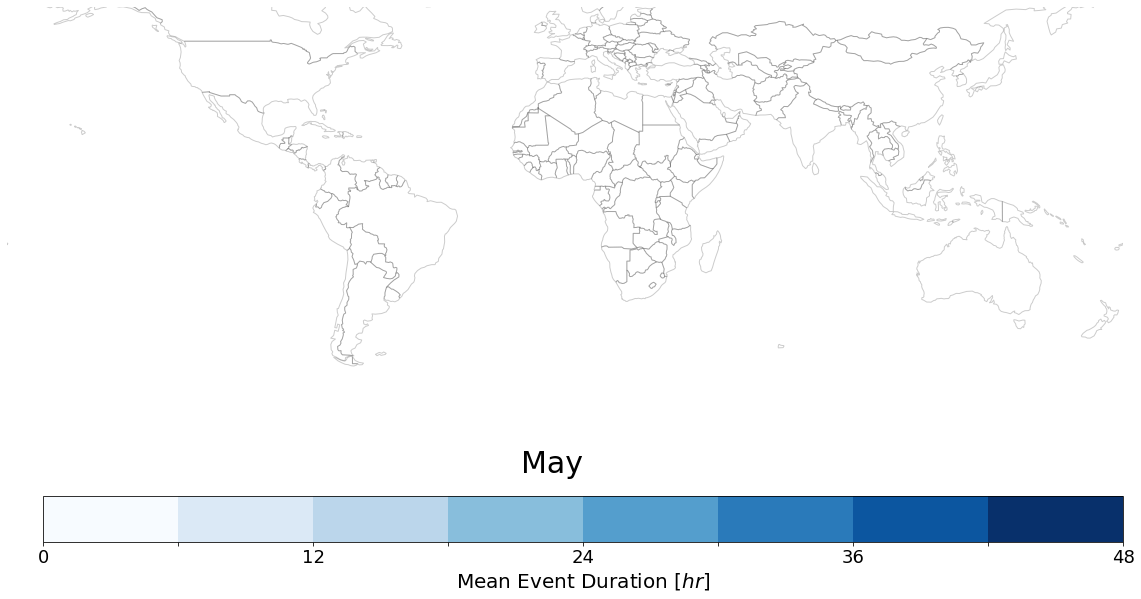

In [88]:
cm1 = plt.cm.get_cmap(var_list[variable]['cmap'],var_list[variable]['nbins']-0)
fig, ax = plt.subplots(figsize=(20, 16))

# a = data.plot(ax=ax, column = variable, edgecolor = 'none', cmap = cm1, vmin = var_list[variable]['min'], vmax=var_list[variable]['max'], zorder = 0)
world.plot(ax=ax, facecolor="none", edgecolor="black", zorder = 1, alpha=0.2)

ax.set_axis_off()
dt_str = '2020-{month}-1'.format(month = month)
mnth_name = pd.to_datetime(dt_str).month_name()
ax.set_xlim([-180, 180])
ax.set_ylim([-60, 60])

ax.text(0.46,-0.25, mnth_name,transform=ax.transAxes, fontsize=30)
cax = fig.add_axes([0.15, 0.2, 0.75, 0.04])
fig.colorbar( a.collections[0], cax=cax, orientation='horizontal')
cax.set_xlabel(var_list[variable]['label'], fontsize=20)

cax.tick_params(labelsize=18)

x_d = np.linspace(var_list[variable]['min'], var_list[variable]['max'], var_list[variable]['nbins']+1)

labels = []
for i,x in enumerate(x_d):
    if i%2==0:
        if variable in ['tb', 'tr', 'count']:
            labels.append(str(int(x)))
        else:
            labels.append(str(x))
    else:
        labels.append('')


cax.xaxis.set_major_locator(ticker.FixedLocator(x_d))
cax.xaxis.set_major_formatter(ticker.FixedFormatter(labels))
# cax.set_xticks(x_d)
# cax.set_xticklabels([str(x) for x in x_d])
fn_out = os.path.join(out_pth,out_fn)